In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('Social_Network_Ads.csv')

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [8]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Text(0.5, 0, 'Salary')

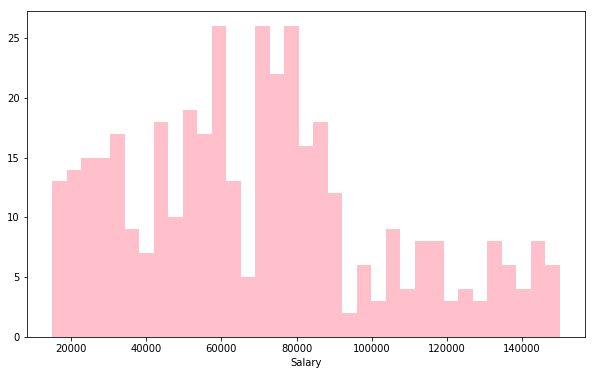

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['EstimatedSalary'],bins=35,color='pink')
plt.xlabel('Salary')

Text(0.5, 0, 'Age')

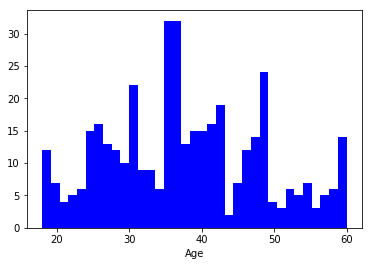

In [13]:
plt.hist(data['Age'],bins=35,color='blue')
plt.xlabel('Age')

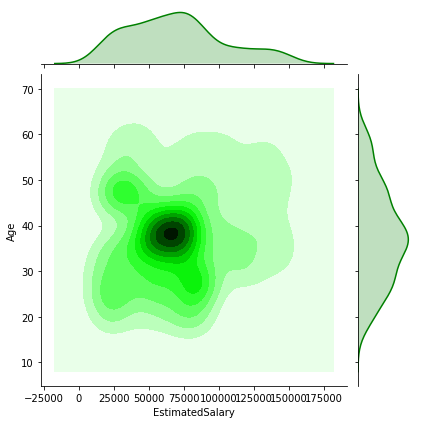

In [15]:
sns.jointplot(x='EstimatedSalary',y='Age',data=data,color='green',kind='kde')

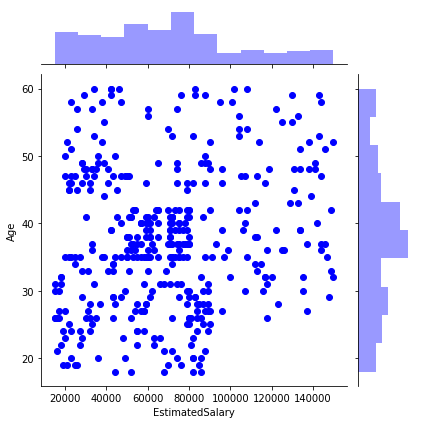

In [17]:
sns.jointplot(x='EstimatedSalary',y='Age',data=data,color='blue')

In [20]:

dummy_ranks = pd.get_dummies(data['Gender'],prefix='Rank')

In [21]:
dummy_ranks.head()

,Rank_Female,Rank_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [42]:
cols_we_need=['Age','EstimatedSalary']

In [43]:
data = data[cols_we_need].join(dummy_ranks.ix[:,0])

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [27]:
data.head()

,Age,EstimatedSalary,Rank_Female
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = data[['Age','EstimatedSalary']]
y = data['Purchased']

KeyError: 'Purchased'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Social_Network_Ads.csv')
x =dataset.iloc[:,[2,3]].values
y =dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
lin =LogisticRegression(random_state=0)

lin.fit(x_train,y_train)


y_pred = lin.predict(x_test)
from sklearn.metrics import confusion_matrix
cv = confusion_matrix(y_test,y_pred)
print(cv)
from matplotlib.colors import  ListedColormap
x_set,y_set =x_test,y_test
x1,x2 =np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop =x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,lin.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
             ,alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set ==j,1],
                c = ListedColormap(('red','green'))(i),label = j)

plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()




[[63  5]
 [ 8 24]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 640x480 with 1 Axes>